/home/sora/anaconda3/envs/mllm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'scores': tensor([0.5048], device='cuda:0'), 'boxes': tensor([[ 291.9338, 1035.7104,  610.9187, 1122.0518]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


/home/sora/anaconda3/envs/mllm/lib/python3.9/site-packages/transformers/models/grounding_dino/processing_grounding_dino.py:95: FutureWarning: The key `labels` is will return integer ids in `GroundingDinoProcessor.post_process_grounded_object_detection` output since v4.51.0. Use `text_labels` instead to retrieve string object names.
  warnings.warn(self.message, FutureWarning)


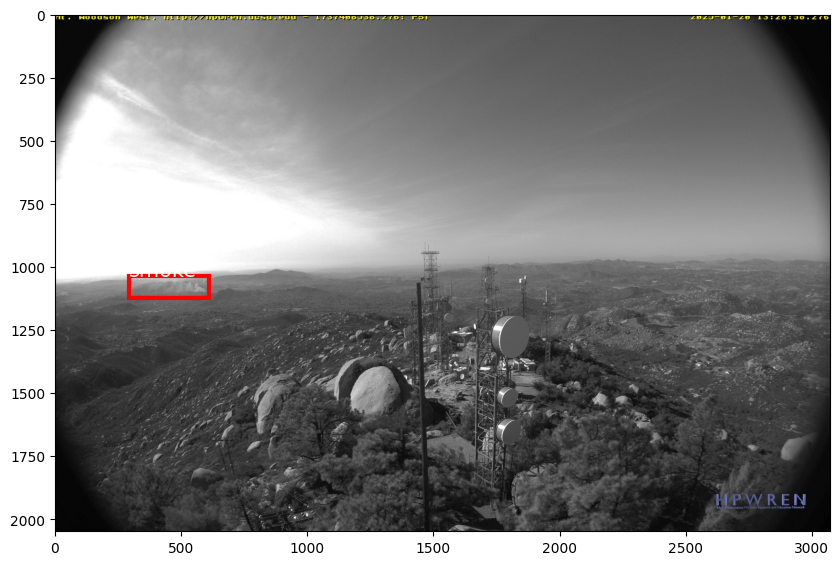

{'scores': tensor([0.5571], device='cuda:0'), 'boxes': tensor([[ 348.9312, 1015.2883,  609.4656, 1118.6157]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


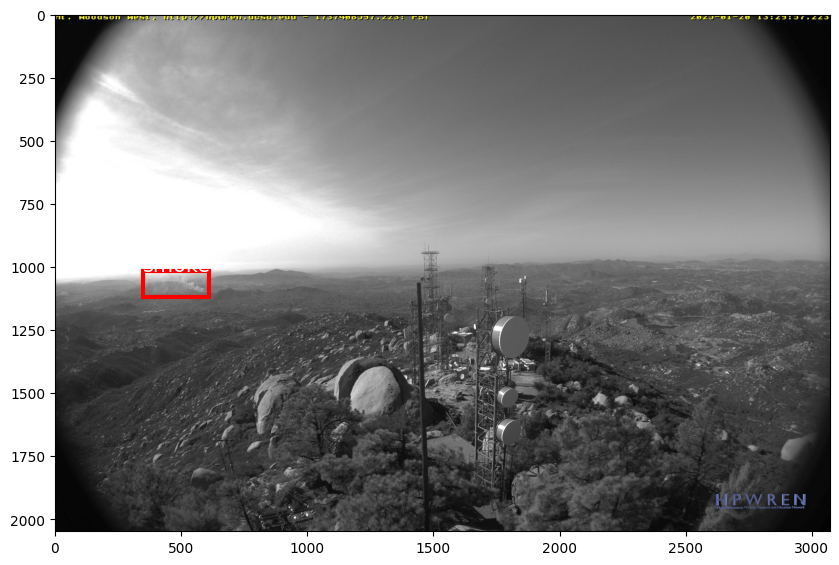

{'scores': tensor([], device='cuda:0'), 'boxes': tensor([], device='cuda:0', size=(0, 4)), 'text_labels': [], 'labels': []}
{'scores': tensor([0.4157, 0.3429], device='cuda:0'), 'boxes': tensor([[2262.3315,  891.9605, 2316.5308,  950.2592],
        [2254.8438,  849.8343, 2320.9028,  953.0485]], device='cuda:0'), 'text_labels': ['smoke', 'smoke'], 'labels': ['smoke', 'smoke']}


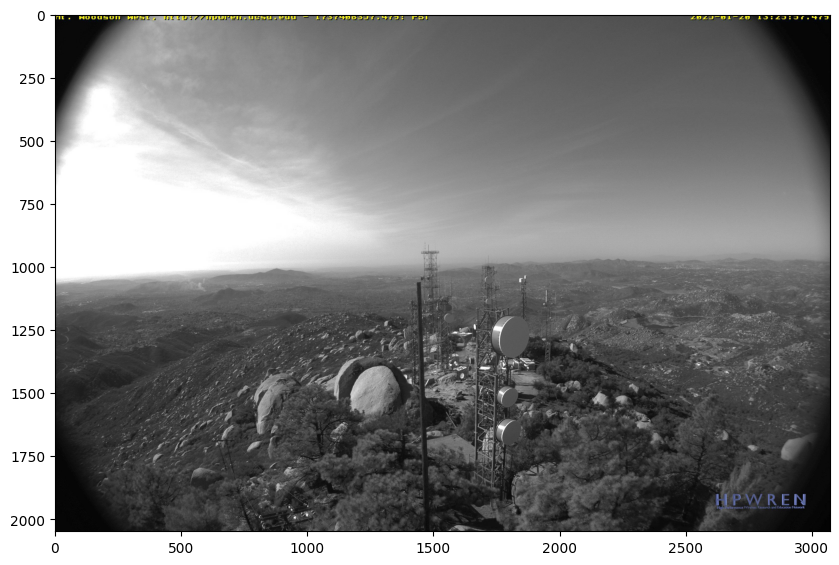

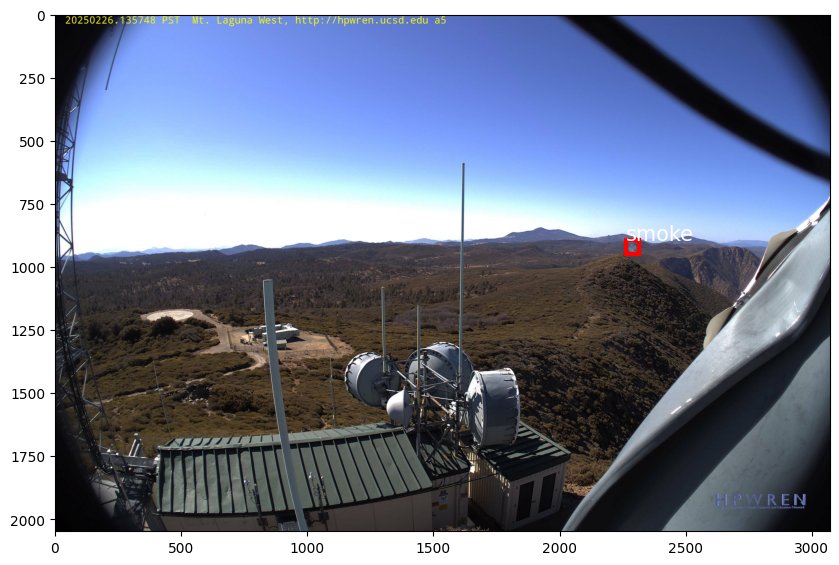

{'scores': tensor([0.4610], device='cuda:0'), 'boxes': tensor([[1053.7054, 1085.9668, 1165.7295, 1168.0310]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


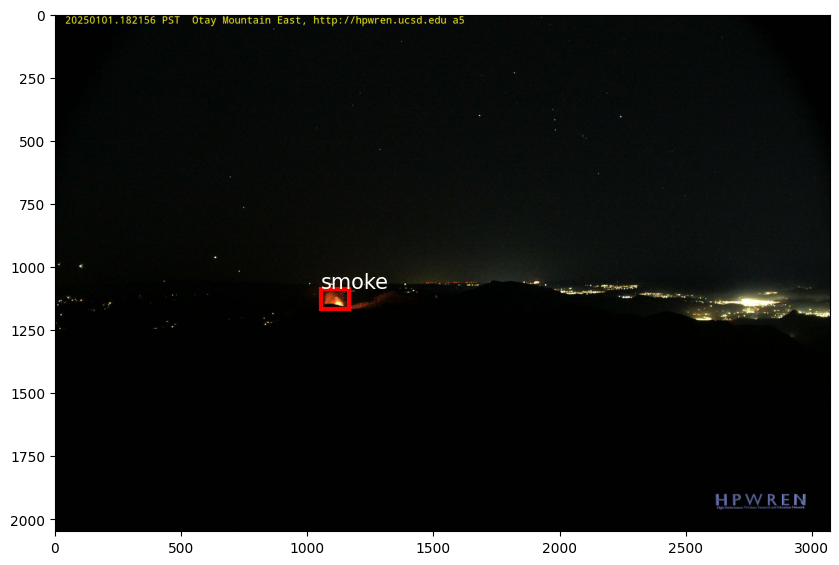

{'scores': tensor([0.3718, 0.3990], device='cuda:0'), 'boxes': tensor([[2198.1011,  882.5703, 2314.5640,  954.8580],
        [2134.9939,  811.5982, 2326.9861,  957.2131]], device='cuda:0'), 'text_labels': ['smoke', 'smoke'], 'labels': ['smoke', 'smoke']}


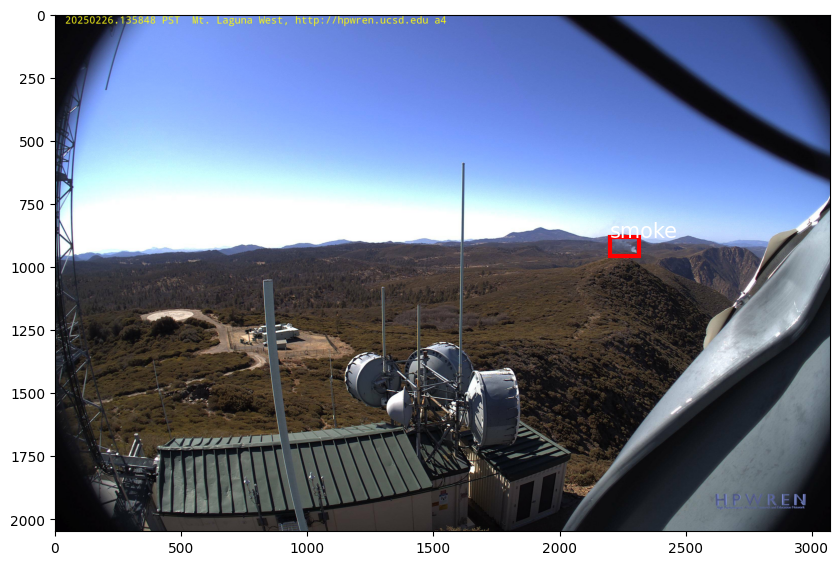

{'scores': tensor([0.6216], device='cuda:0'), 'boxes': tensor([[2086.5107,  741.0697, 2290.8223,  953.9989]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


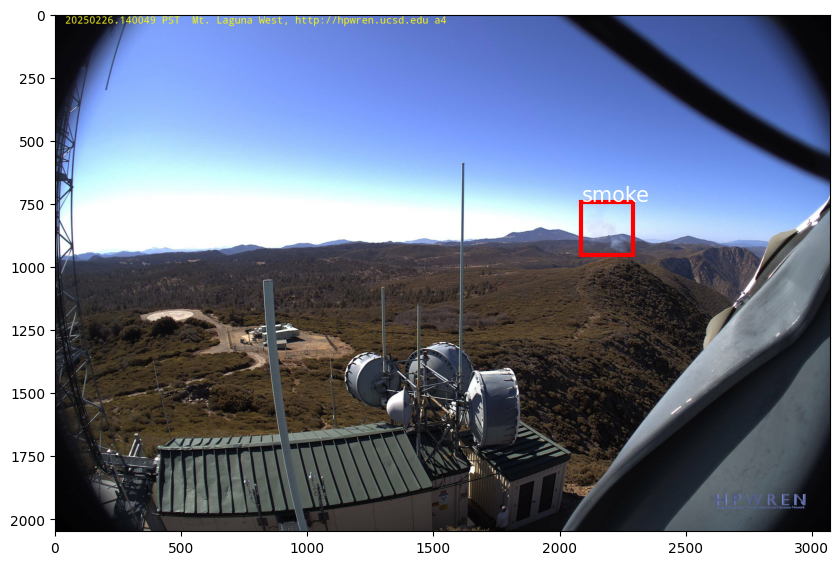

{'scores': tensor([0.6321], device='cuda:0'), 'boxes': tensor([[2113.0322,  776.3940, 2319.6597,  952.8481]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


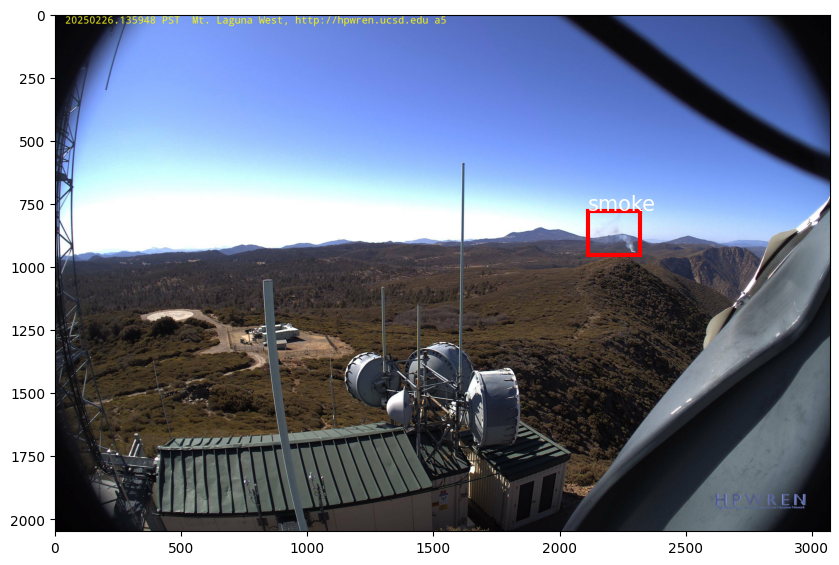

{'scores': tensor([0.5689], device='cuda:0'), 'boxes': tensor([[2091.6028,  785.7847, 2290.1226,  950.8346]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


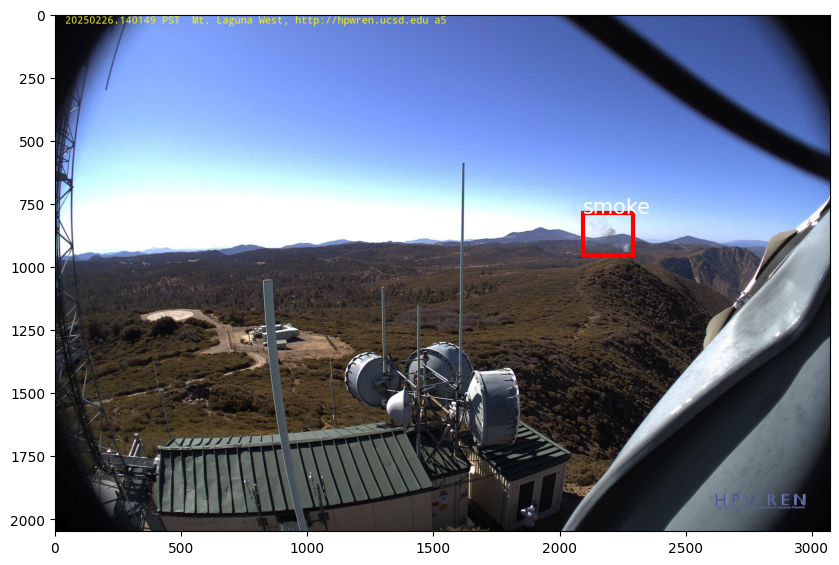

{'scores': tensor([0.3578], device='cuda:0'), 'boxes': tensor([[ 453.7027, 1027.8235,  614.3996, 1116.6069]], device='cuda:0'), 'text_labels': ['smoke'], 'labels': ['smoke']}


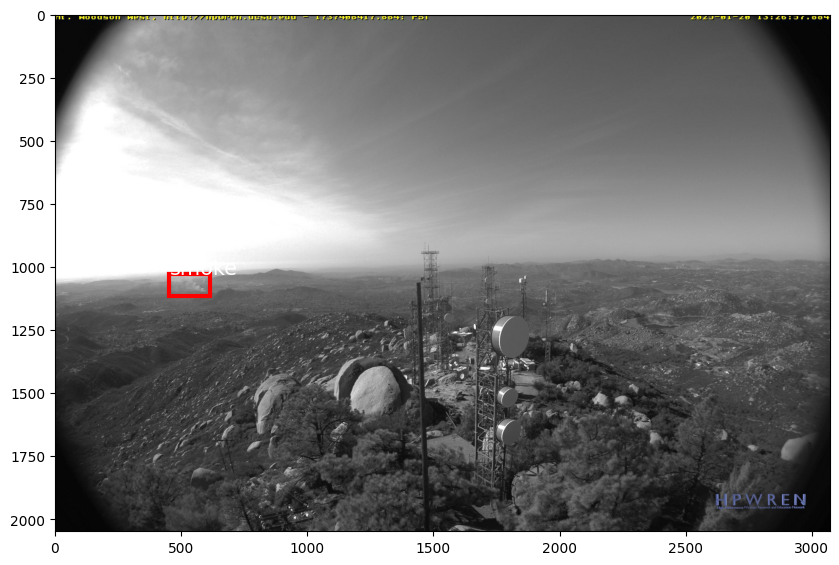

{'scores': tensor([], device='cuda:0'), 'boxes': tensor([], device='cuda:0', size=(0, 4)), 'text_labels': [], 'labels': []}
{'scores': tensor([], device='cuda:0'), 'boxes': tensor([], device='cuda:0', size=(0, 4)), 'text_labels': [], 'labels': []}
{'scores': tensor([0.3636, 0.3469], device='cuda:0'), 'boxes': tensor([[ 295.5537, 1031.9969,  621.3088, 1122.7970],
        [ 408.7178, 1035.7153,  609.3384, 1114.8525]], device='cuda:0'), 'text_labels': ['smoke', 'smoke'], 'labels': ['smoke', 'smoke']}


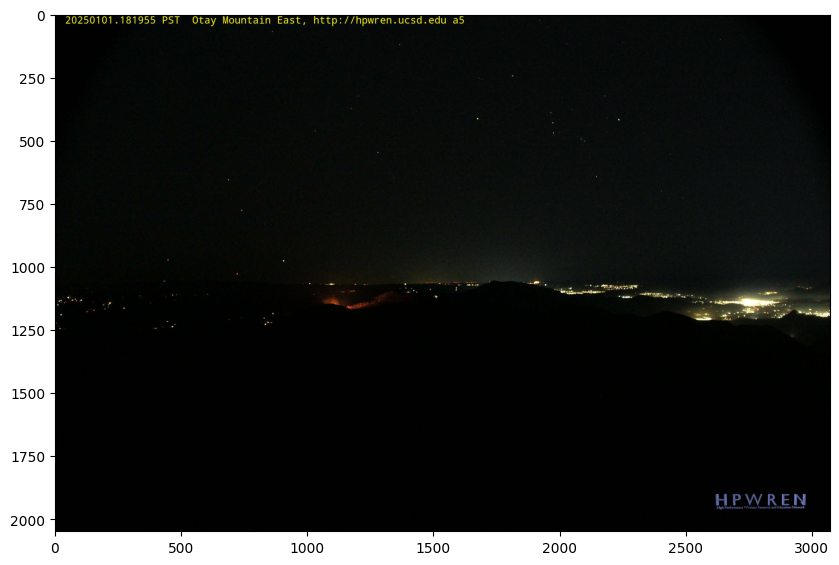

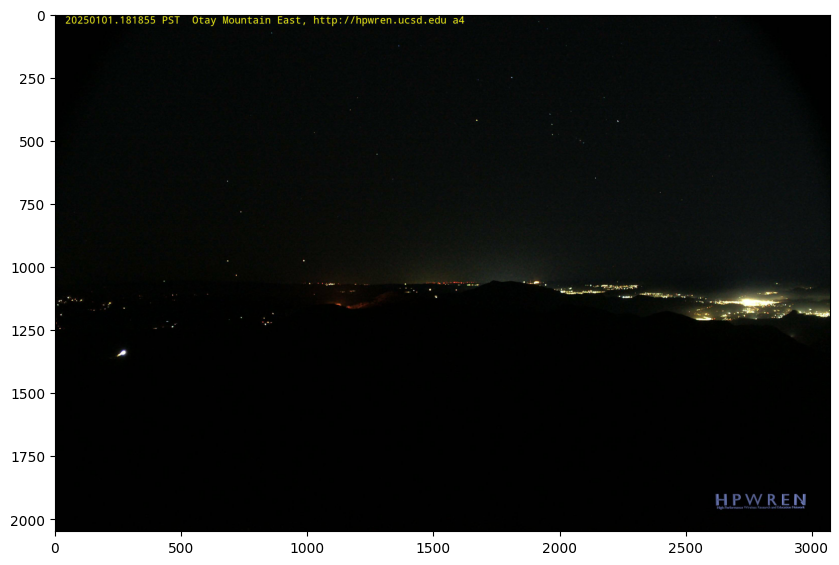

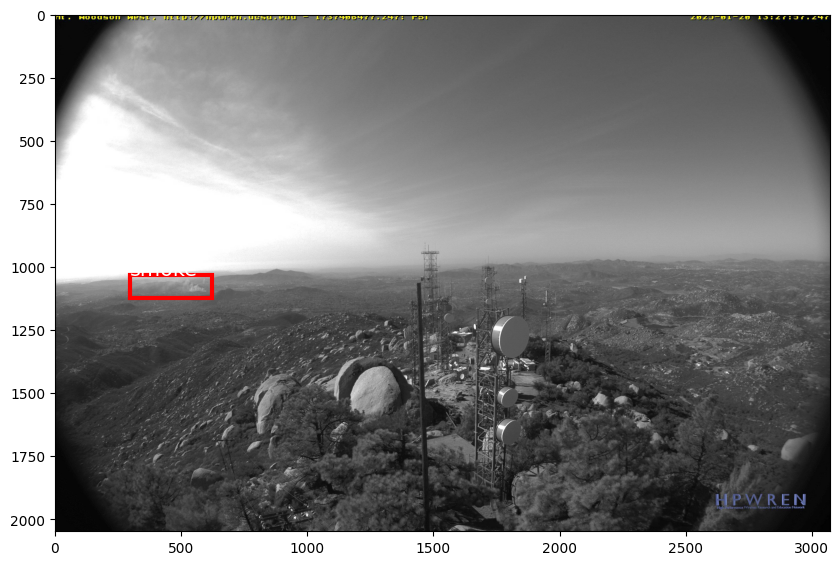

In [1]:
import os
import torch
import transformers
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
#加载

device = "cuda"


def grounding_smoke(image_path, model, processor):
    image = Image.open(image_path)
    text_labels = [["smoke"]]
    inputs = processor(image, text_labels, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    results = processor.post_process_grounded_object_detection(
        outputs,
        inputs.input_ids,
        box_threshold=0.3,
        text_threshold=0.3,
        target_sizes=[image.size[::-1]],
    )
    result = results[0]
    print(result)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
        x0, y0, x1, y1 = box.tolist()
        ax.add_patch(plt.Rectangle((x0, y0), x1 - x0, y1 - y0, fill=False, color="r", linewidth=3))
        ax.text(x0, y0, label, fontsize=15, color="white")
        plt.show()

def grounding_image_folder(model_name):
    processor = AutoProcessor.from_pretrained(model_name)
    model = AutoModelForZeroShotObjectDetection.from_pretrained(model_name).to(device)
    folder = "./confused_images"
    for filename in os.listdir(folder):
        grounding_smoke(os.path.join(folder, filename), model, processor)

# model name
# IDEA-Research/grounding-dino-base
model_id = "IDEA-Research/grounding-dino-base"
grounding_image_folder(model_id)